# Project Summary: Client Subscribed to a Term Deposit


## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.


In [50]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Loading Dataset
df=pd.read_csv('bankmarketing.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Showing first 5 rows
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Showing last 5 rows
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# Find the shape of the dataset
df.shape

(41188, 21)

In [ ]:
# Show the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Find statistical information
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Check null value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Check duplicate row
df.duplicated().sum()

np.int64(12)

In [ ]:
# Show duplicate rows
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
# Show the shape before deleting duplicate rows
df.shape

(41188, 21)

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Shape of dataset after deleting duplicate values
df.shape

(41176, 21)

In [ ]:
# Check datatypes
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


# EDA

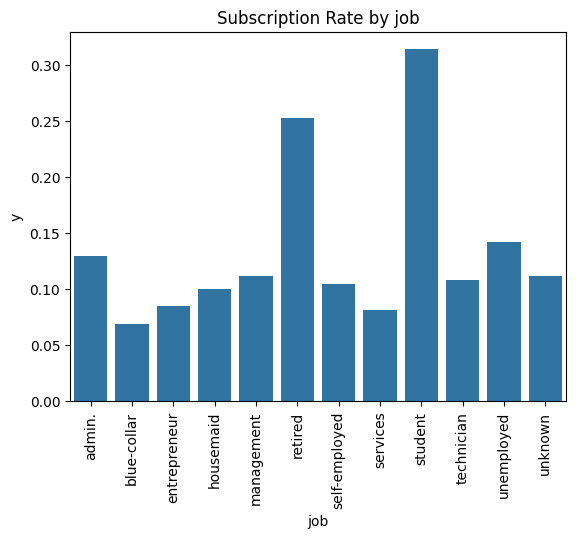

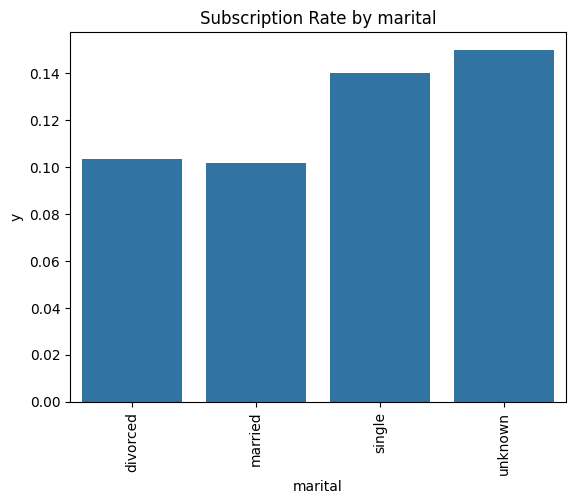

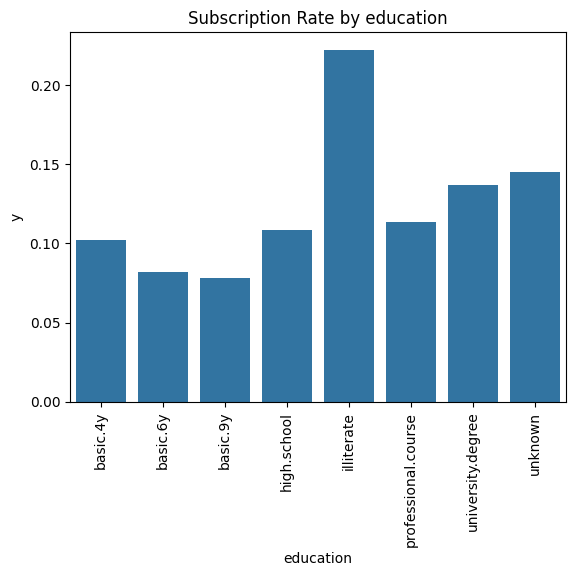

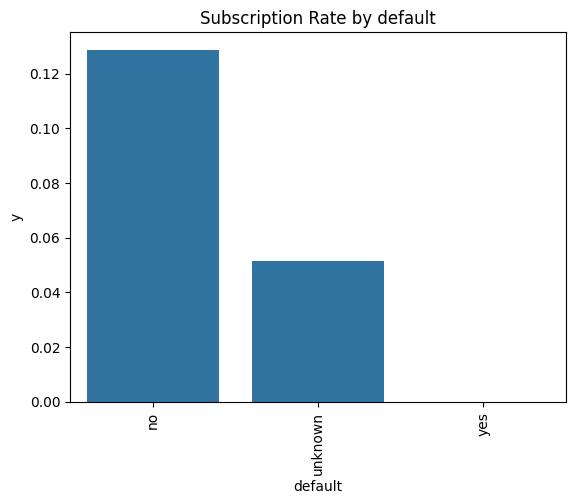

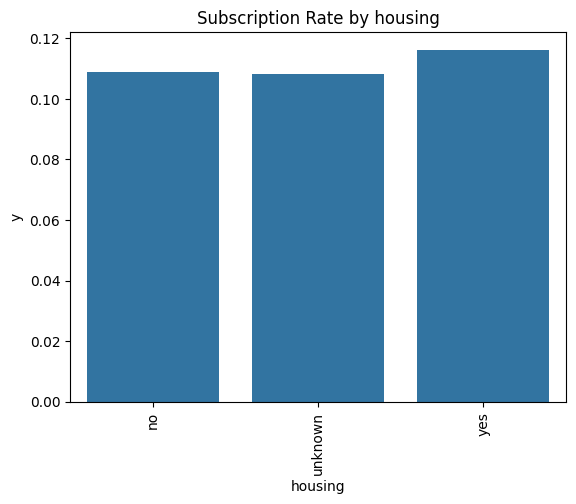

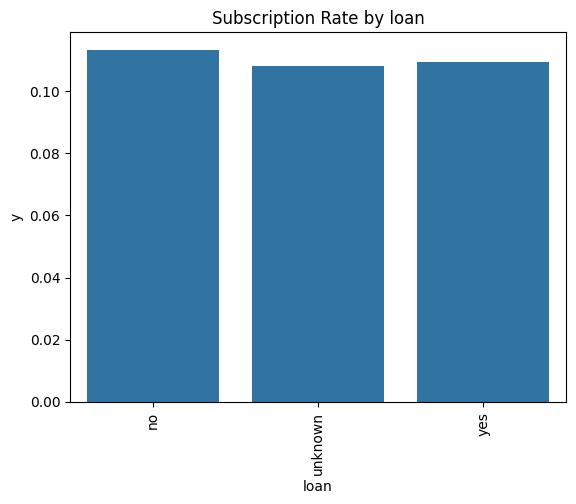

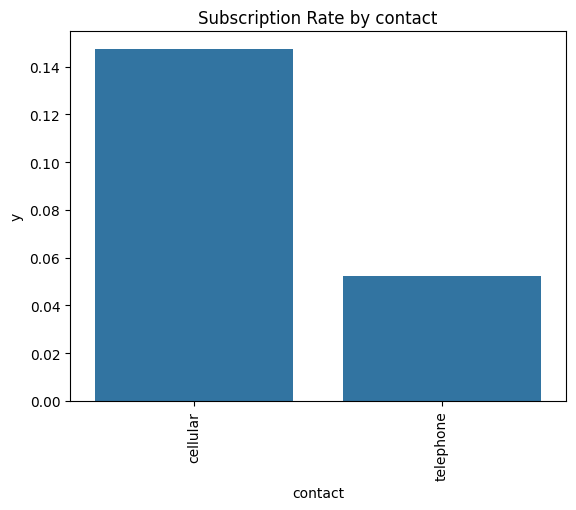

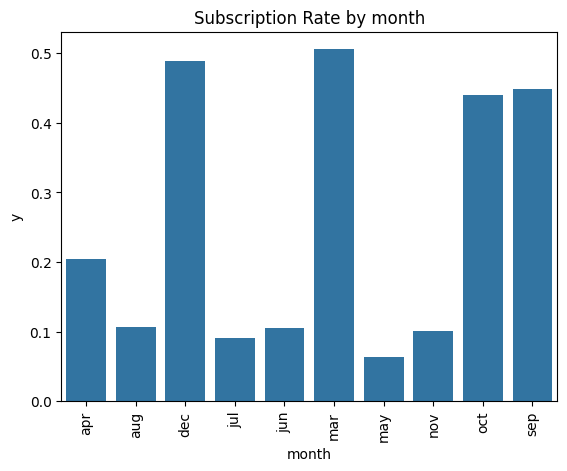

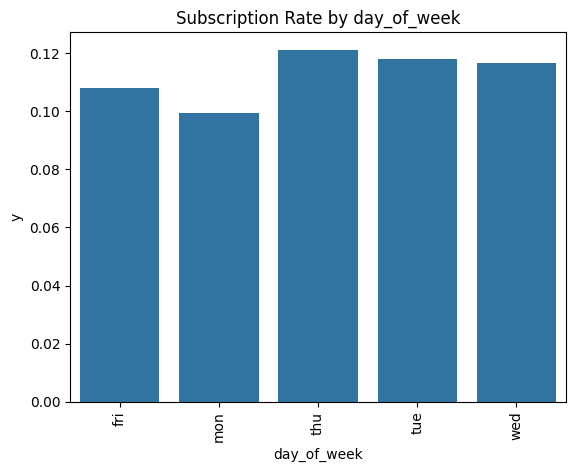

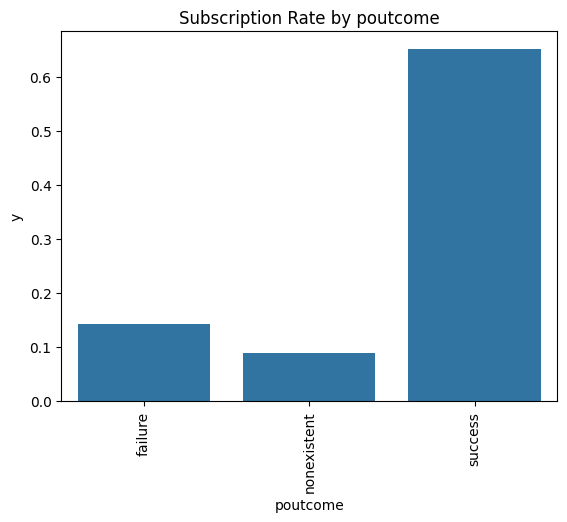

In [ ]:
# Subscription rate of term deposit by every categorical feature
df['y']=df['y'].astype('category').cat.codes
categorical_var=df.select_dtypes(include='object').columns.tolist()
for i in categorical_var:
    sns.barplot(x=df.groupby(i)['y'].mean().index,
                y=df.groupby(i)['y'].mean())
    plt.title(f'Subscription Rate by {i}')
    plt.xticks(rotation=90)
    plt.show()

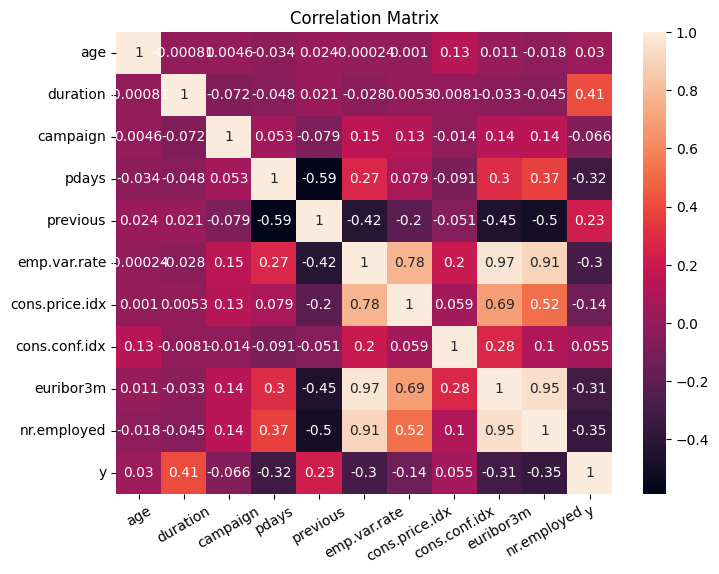

In [ ]:
# Analyze the corelation of numerical features
plt.figure(figsize=(8,6))
df['y']=df['y'].astype('category').cat.codes
numerical_var=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
numerical_var_y=numerical_var+['y']
sns.heatmap(df[numerical_var_y].corr(),annot=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

In [ ]:
# Label Encoding of target variables
df['y']=df['y'].astype('category').cat.codes
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# One Hot Encoedr of categorical variables
df=pd.get_dummies(df).astype('int')
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1,94,-50,1,4963,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1,94,-50,1,4963,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1,94,-50,1,4963,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1,94,-50,1,4963,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Divide the dataset into x & y
x=df.drop(['y'],axis=1)
y=df['y']

In [ ]:
# Apply Feature Scaling
st=StandardScaler()
ss=st.fit_transform(x)

In [ ]:
# Apply TrainTest Split
x_train,x_test,y_train,y_test=train_test_split(ss,y,test_size=0.2,random_state=20)

In [ ]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Model Performance of training data
x_train_pred=lr.predict(x_train)
train_accu=accuracy_score(x_train_pred,y_train)
print('Accuracy : ',train_accu)

Accuracy :  0.9110200364298725


In [ ]:
# Model performance of testing data
x_test_pred=lr.predict(x_test)
test_accu=accuracy_score(x_test_pred,y_test)
print('Accuracy : ',test_accu)

Accuracy :  0.9116075764934434


In [ ]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Model Performance of training data
x_train_pred=dt.predict(x_train)
train_accu=accuracy_score(x_train_pred,y_train)
print('Accuracy : ',train_accu)

Accuracy :  1.0


In [ ]:
# Model performance of testing data
x_test_pred=dt.predict(x_test)
test_accu=accuracy_score(x_test_pred,y_test)
print('Accuracy : ',test_accu)

Accuracy :  0.8874453618261292


In [ ]:
# Random Forest
fr=RandomForestClassifier()
fr.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Model Performance of training data
x_train_pred=fr.predict(x_train)
train_accu=accuracy_score(x_train_pred,y_train)
print('Accuracy : ',train_accu)

Accuracy :  1.0


In [ ]:
# Model performance of testing data
x_test_pred=fr.predict(x_test)
test_accu=accuracy_score(x_test_pred,y_test)
print('Accuracy : ',test_accu)

Accuracy :  0.9091792132102963



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
